<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"  

# Исследование структуры данных

1). Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data_proj = pd.read_csv('data_hh/dst-3.0_16_1_hh_database.csv', sep=';')
data_hh = data_proj.copy()

# Задание 2.1
# Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
display(data_hh.shape)

(44744, 12)

2). Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
data_hh.head()

# Задание 2.2
# В каком формате представлен порядок слов в признаке «Пол, возраст»?
# <Пол, возраст, дата рождения>

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3). Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4). Обратите внимание на информацию о числе непустых значений.

In [4]:
data_hh.info()

# Задание 2.3
# Какой тип данных имеют все столбцы? 
# object

# Задание 2.4
# Выберите все признаки, в которых есть пропуски в данных:
# <'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность'>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5). Выведите основную статистическую информацию о столбцах.


In [5]:
data_hh.describe(include=['object'])

# Задание 2.5
# Сколько уникальных значений содержится в столбце «Опыт работы»?
# unique - 44413

# Какая из искомых должностей самая распространённая? 
# top - Системный администратор

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1). Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# пишем функцию, чтобы выделить "образование" из всей строки
def get_edu(edu_inst): 
    """ Функция делит строку по пробелам, обрезает список, оставляя в нём 2 элемента,
    и склеивает их.

    Args:
        edu_inst (object): ['Образование и ВУЗ'], (<Уровень образования год выпуска ВУЗ специальность...>)

    Returns:
        object: строку из двух слов
    """
    edu_inst_list = edu_inst.split(' ') 
    edu_cat = edu_inst_list[:2]
    edu_cat = " ".join(edu_cat)
    return edu_cat

# применяем функцию к столбцу
educ_cats = data_hh['Образование и ВУЗ'].apply(get_edu) 
# меняем 'Высшее образование' и 'Среднее образование' на 'Высшее' и 'Среднее' соответственно 
# (чтобы соблюсти условие задания)
educ_cats = educ_cats.apply(lambda x: 'Высшее' if x == 'Высшее образование' else x)
data_hh['Образование'] = educ_cats.apply(lambda x: 'Среднее' if x == 'Среднее образование' else x)

# проверяем результат
data_hh['Образование'].unique()

# удаляем столбец "Образование и ВУЗ"
data_hh = data_hh.drop(['Образование и ВУЗ'], axis=1)

#Задание 3.1
#Сколько соискателей имеет средний уровень образования (школьное образование)?
display(data_hh['Образование'].value_counts())

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2). Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
# разделим строку в столбце "Пол, возраст" (разделитель - запятая) и сохраним в переменную
split_str_Gen = data_hh['Пол, возраст'].apply(lambda x: x.split(',')) 

# создаем признак "Пол", 2 значения: "М" и "Ж"
data_hh['Пол'] = split_str_Gen.apply(lambda x: 'М' if x[0] == 'Мужчина ' else 'Ж')

# создаем признак "Возраст", попробуем взять срез в списке, приводим его к типу int 
data_hh['Возраст'] = split_str_Gen.apply(lambda x: int(x[1][:4]) )

# удаляем столбец "Пол, возраст"
data_hh = data_hh.drop(['Пол, возраст'], axis=1)


# Задание 3.2
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
display(data_hh['Пол'].value_counts(normalize=True))
# Чему равен средний возраст соискателей? Ответ округлите до десятых.
display(data_hh['Возраст'].mean().round(1))

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

32.2

3). Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
# пишем функцию, чтобы упорядочить информацию об опыте
def get_exp(experience):
    """
    Функция проверяет данные на пропуски, явные и скрытые, если они есть  возвращает None,
    разбивает строку и обрезает ее (отбрасывая ненужные данные),
    проверяет наличие ключевых слов в заданных списках

    Args:
        experience (object): 'Опыт работы', <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>

    Returns:
        float: Опыт работы в месяцах
    """
    if (experience is np.nan) or (experience == 'Не указано'):
        return None
    
    cut_exp = experience.split(' ')[0:7]       
    years_list = ['года', 'год', 'лет'] # задаём список вариантов слова "год"
    month_list = ['месяц', 'месяца', 'месяцев'] # то же самое для "месяц"
    year = 0 
    month = 0
    for ind, word in enumerate(cut_exp): # для каждого элемента cut_exp
        # если элемент есть в списке years_list записываем, что теперь year  равна значению под предыдущим индексом
        if word in years_list:
            year = int(cut_exp[ind-1]) 
            # для месяцев то же самое
        if word in month_list:
            month = int(cut_exp[ind-1])
        
    return int(year*12+month)
    
data_hh['Опыт работы, месяц'] = data_hh['Опыт работы'].apply(get_exp)


# Задание 3.3
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
display(data_hh['Опыт работы, месяц'].median())

# удаляем признак "Опыт работы"

data_hh = data_hh.drop(['Опыт работы'], axis=1)

100.0

4). Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
def get_city(arg):
    """
    Функция делит строку на подстроки, 
    проверяет первый элемент получившегося списка на вхождение в списки городов
     (для этого еще удаляет пробел в конце элемента).

    Аргументы :
        arg (object): столбец '<Город , (метро) , 
        готовность к переезду (города для переезда) , готовность к командировкам>' 
        
    Returns:    
    object: одну из категорий "Москва", "Санкт-Петербург", "город-миллионник", "другие".
        
    """
    capit_list = ['Москва', 'Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород',
                      'Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    data_trip_list = arg.split(',') 
    city = data_trip_list[0].rstrip() 
    city_var = None                   
    if city in million_cities: 
        city_var = 'город-миллионник'
    elif city in capit_list:
        city_var = city
    else:        
        city_var = 'другие'
    return city_var
        
        
def get_reloc(arg):
    """
    Функция проверяет наличие ключевых слов в строке и возвращает значение в зависимости от результата

    Args:
        arg (object): столбец '<Город , (метро) , 
        готовность к переезду (города для переезда) , готовность к командировкам>' 

    Returns:
        bool: True, если кандидат готов к переезду, и False, если не готов
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
    
def get_trip(arg):
    """
    Функция проверяет наличие ключевых слов в строке и возвращает значение в зависимости от результата, 
    если данные отсутствуют, считается, что кандидат не готов к командировкам

    Args:
        arg (object): столбец '<Город , (метро) , 
        готовность к переезду (города для переезда) , готовность к командировкам>' 

    Returns:
        bool: True, если кандидат готов к командировкам, и False, если не готов
    """
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False


# создаем признаки "Город", "Готовность к переезду", "Готовность к командировкам"
data_hh['Город'] = data_hh['Город, переезд, командировки'].apply(get_city)
data_hh['Готовность к переезду'] = data_hh['Город, переезд, командировки'].apply(get_reloc)
data_hh['Готовность к командировкам'] = data_hh['Город, переезд, командировки'].apply(get_trip)

# удаляем признак 'Город, переезд, командировки'
data_hh = data_hh.drop(['Город, переезд, командировки'], axis=1)

# Задание 3.4
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
data_hh['Город'].value_counts(normalize=True)
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
numer_ =  data_hh[(data_hh['Готовность к переезду'] == True) & (data_hh['Готовность к командировкам'] == True)].shape[0]
denom_ = data_hh.shape[0]
display(round((numer_/denom_)*100))


32

5). Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
# создаем список категорий для признака "Занятость"
employ_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
# проверяем категорию на наличие в списке и создаем новые признаки
for employ in employ_list: 
    data_hh[employ] = data_hh['Занятость'].apply(lambda x: employ in x)
# то же для признака "График"    
chart_list =  ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for chart in chart_list:
    data_hh[chart] = data_hh['График'].apply(lambda x: chart in x)
    
    
# Задание 3.5
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
display(data_hh[(data_hh['проектная работа'] == True) & (data_hh['волонтерство'] == True)].shape[0])

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
display(data_hh[(data_hh['вахтовый метод'] == True) & (data_hh['гибкий график'] == True)].shape[0])

# удаляем столбцы "Занятость" и "График"
data_hh = data_hh.drop(["Занятость", "График"], axis=1)


436

2311

6). (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
# читаем данные о курсах валют и создаем новый датафрейм
exchange_data = pd.read_csv('data_hh/ExchangeRates.csv') 
exchange_df = exchange_data.copy()
# удаляем ненужные столбцы
exchange_df = exchange_df.drop(['per', 'time', 'vol'], axis=1) 
# переводим признак "Обновление резюме" из таблицы с резюме в формат datetime 
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме'], dayfirst=True)
# достаем из него дату и перезаписываем признак, так как время нам не нужно, и снова приводим к формату datetime
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме'].dt.date)
# признак 'date' из таблицы 'exchange_df' также приводим к формату datetime
exchange_df['date'] = pd.to_datetime(exchange_df['date'], dayfirst=True)

# разделим строки в столбце "ЗП" и занесем в переменную salary_list
salary_list = data_hh['ЗП'].apply(lambda x: x.split(' '))

# выделим  сумму зарплаты в отдельный столбец
data_hh['ЗП, сумма'] = salary_list.apply(lambda x: x[0])
# получился тип данных object, поэтому приводим к числовому типу
data_hh['ЗП, сумма'] = data_hh['ЗП, сумма'].astype('float')

# выделим указанную валюту в отдельный столбец
data_hh['валюта'] = salary_list.apply(lambda x: x[-1])
display(data_hh['валюта'].value_counts().index) # список для словаря
# составляем словарь
cur_dict = {'руб.':'RUB', 'KZT':'KZT', 
            'USD':'USD', 'бел.руб.':'BYN', 
            'EUR':'EUR', 'грн.':'UAH', 
            'сум':'UZS', 'KGS':'KGS', 'AZN':'AZN'}
# заменяем строки в столбце 'валюта' значениями из словаря
data_hh['валюта'] = data_hh['валюта'].apply(lambda x: cur_dict[x])


# объединяем таблицы
data_hh_merged = data_hh.merge(
    exchange_df,
    left_on=['валюта', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)
# проверим чтобы кол-во строк совпадало в ориг. и итоговой таблице
display(data_hh.shape[0])
display(data_hh_merged.shape[0])


# заполняем значения "close" для рубля единицей 
data_hh_merged['close'] = data_hh_merged['close'].fillna(1)
# также заполняем значения для рубля единицей в столбце "proportion"
data_hh_merged['proportion'] = data_hh_merged['proportion'].fillna(1)

# создаем новый столбец "ЗП, руб", где знач="ЗП, сумма"*"close"/"proportion"
multi_var = data_hh_merged['ЗП, сумма']*data_hh_merged['close']
data_hh_merged['ЗП, руб'] = multi_var/data_hh_merged['proportion']
display(data_hh_merged['ЗП, руб'].head())


# удаляем ненужные столбцы
data_hh_merged = data_hh_merged.drop(['ЗП', 'ЗП, сумма', 'валюта', 'currency', 'date', 'close', 'proportion'], axis=1)


# Задание 3.6
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого. 
display((data_hh_merged['ЗП, руб'].median()/1000).round(0))

Index(['руб.', 'KZT', 'USD', 'бел.руб.', 'EUR', 'грн.', 'сум', 'KGS', 'AZN'], dtype='object')

44744

44744

0     29000.0
1     40000.0
2     20000.0
3    100000.0
4    140000.0
Name: ЗП, руб, dtype: float64

59.0

# Исследование зависимостей в данных

1). Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

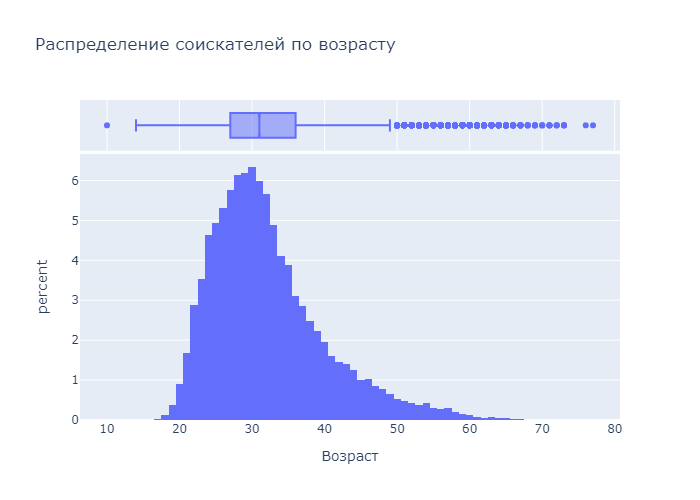

0    30
Name: Возраст, dtype: int64

In [12]:
# строим по признаку "Возраст" гистограмму и коробчатую диаграмму
age_hist = px.histogram(
    data_frame=data_hh_merged,
    x='Возраст',
    width=700, 
    title='Распределение соискателей по возрасту',
    histnorm='percent',
    marginal='box'
)

age_hist.show("png")
age_hist.write_html("plotly/age_hist.html")

# Задание 4.1
# Чему равно модальное значение возраста соискателей?
display(data_hh_merged['Возраст'].mode())

- Мода распределения равна 30 годам.
- Предельные значения признака - 14 и 49 лет.
- Возраст большинства соискателей в пределах 27-36 лет.
- Определенно аномален кандидат 10 лет.

Основной массе кандидатов около 27-36 лет, предположительно в этом возрасте люди больше склонны к переменам, ищут карьерного или финансового роста. Помимо 10-летнего соискателя, также вряд ли стоит учитывать кандидатов младше 19 лет.


2). Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

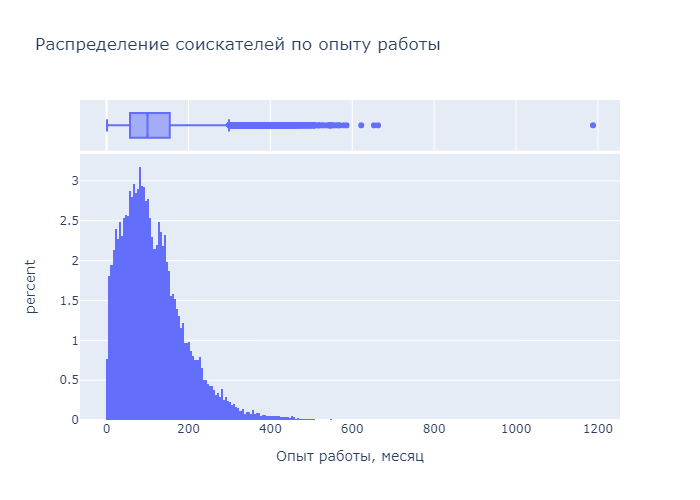

1188.0

In [13]:
# строим по признаку "Опыт работы, месяц" гистограмму и коробчатую диаграмму
exp_hist = px.histogram(
    data_frame=data_hh_merged,
    x='Опыт работы, месяц',
    width=700, 
    title='Распределение соискателей по опыту работы',
    histnorm='percent',
    marginal='box'
)

exp_hist.show("png")
exp_hist.write_html("plotly/exp_hist.html")

# Задание 4.2
# Чему равен максимальный опыт работы (в месяцах)?
display(data_hh_merged['Опыт работы, месяц'].max())

- Мода распределения равна 84 месяца.
- Предельные значения признака - от 1 до 299 месяцев.
- У большинства соискателей опыт работы 57-154 месяца (приблизительно 5-13 лет).
- Очевидное аномальное значение - 1188-месячный (99 лет) опыт работы. 

Медианный опыт равен 100 мес., данные смещены в направлении нижней границы. Это может быть связано с возрастом, чем моложе кандидат, тем меньше опыта, или с востребованностью, специалисты с большим опытом меньше нуждаются в перемене работы или поиске вакансий через сайт.

3). Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


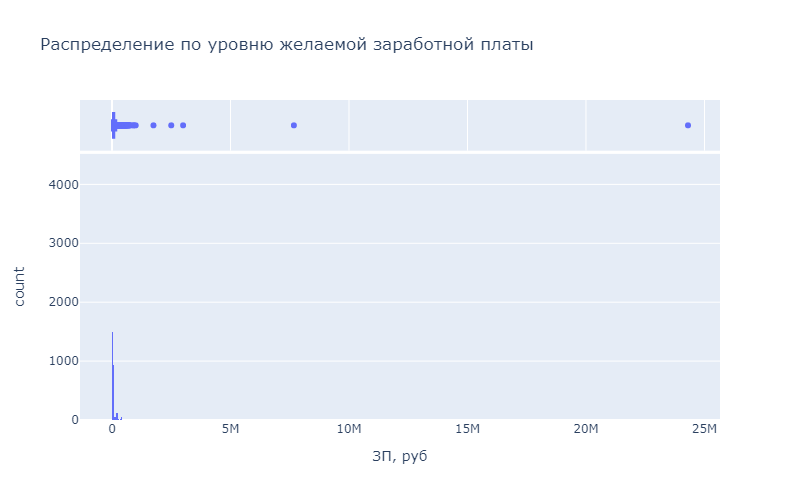

In [14]:
# строим гистограмму и коробчатую диаграмму по признаку "ЗП, руб" 
sal_hist = px.histogram(
    data_frame=data_hh_merged,
    x='ЗП, руб',
    width=800, 
    title='Распределение по уровню желаемой заработной платы',
    marginal='box'
)

sal_hist.show("png")
sal_hist.write_html("plotly/sal_hist.html")

# Задание 4.3
# Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.
# на графике отчетливо видны 5 точек-значений свыше 1 млн.руб.

- Предельные значения признака от 1 руб. до 180,9 тыс.руб.
- заработная плата большинства соискателей находится в интервале jn 37 до 95 тыс.руб.
- Аномальны как значения, исчисляющиеся миллионами (24,3 млн., 7,68 млн. и т.д.), так и значения, равные 1 руб.

В первую очередь привлекает внимание вид графика, типичный для большого количества выбросов. Кроме того, некоторые значения, хотя визуально сливаются с графиком, логически неуместны, например, зарплата в 1 руб. Подавляющее большинство значений сосредоточено в пределах 100 тыс.руб. Количество претендующих на зарплату свыше этой суммы резко уменьшается.

4). Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

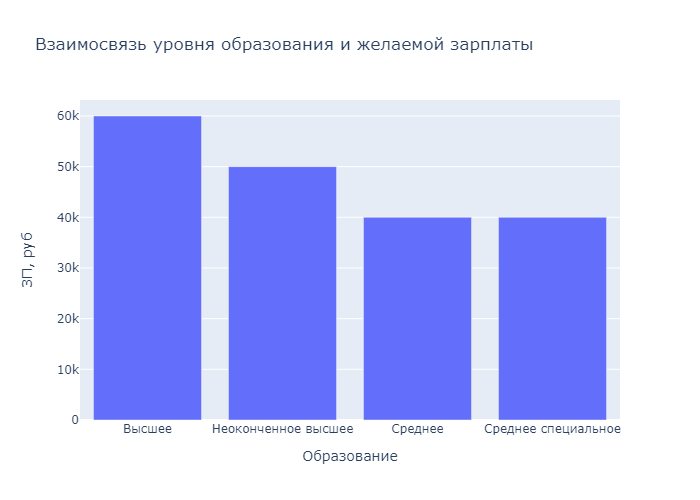

In [15]:
# фильтруем данные по зарплате, берем данные, где зарплата меньше 1 млн.руб
sal_filter = data_hh_merged['ЗП, руб'] < 1000000
# и задаем данные для диаграммы
sal_edu_data = data_hh_merged[sal_filter].groupby('Образование', as_index=False).median()

# строим столбчатую диаграмму
sal_edu_bar = px.bar(
    sal_edu_data,
    x='Образование', 
    y='ЗП, руб',
    height=500,
    width=700, 
    title='Взаимосвязь уровня образования и желаемой зарплаты', 
)

sal_edu_bar.show("png")
sal_edu_bar.write_html("plotly/sal_edu_bar.html")


# Задание 4.4
# Какая категория образования оплачивается выше всех по медианному показателю?
# Высшее образование


Наибольший медианный уровень желаемой заработной платы наблюдается для высшего образования и равен 60 тыс. руб. Для среднего и среднего специального образования медианный уровень зарплаты одинаковый и равен 40 тыс.руб. Кандидаты с неоконченным высшим образованием претендуют на медианную зарплату в 50 тыс.руб. 

График демонстрирует, что уровень образования напрямую связан с заработной платой: соискатели с высшим образованием претендуют и на более высокую оплату.


5). Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

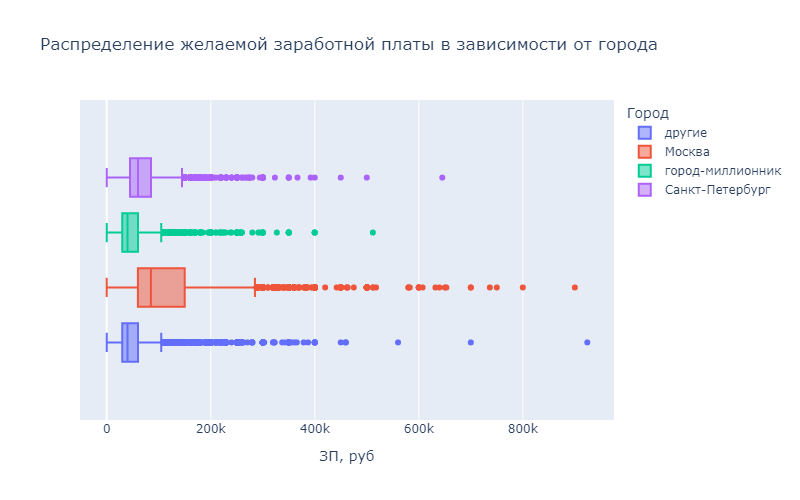

In [16]:
# задаем данные для диаграммы, используя предыдущий фильтр,
# где зарплата меньше 1 млн.руб
sal_city = data_hh_merged[sal_filter]

sal_city_box = px.box(
    data_frame=sal_city,
    x='ЗП, руб',
    color='Город',
    height=500, 
    width=800, 
    title='Распределение желаемой заработной платы в зависимости от города', 
)
sal_city_box.show("png")
sal_city_box.write_html("plotly/sal_city_box.html")

#Задание 4.5
#В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?
#"другие"

График показывает разницу в медианных уровнях зарплат и их размах в разрезе города проживания. Наибольшая медиана желаемой зарплаты в Москве - 85 тыс.руб., на втором месте Санкт_Петербург - 60 тыс.руб., медианы в городах-миллионниках такие же как и в прочих городах - 40 тыс.руб. При этом жители Москвы, в основном, желают получать зарплату от 60 до 150 тыс.руб., а Санкт-Петербурга - от 44,5 до 85 тыс.руб. Остальные кандидаты, включая жителей городов-миллионников, претендуют на зарплату 30-60 тыс.руб. 

При прогнозировании заработной платы признак города безусловно важен, к примеру, lля Москвы характерны, как более высокий уровень желаемой зарплаты, так и наибольший ее разброс. Это может быть связано со стоимостью жизни в столице, либо с уровнем притязаний столичных жителей. Санкт-Петербург занимает второе место, но с большим отрывом: 75% квантиль зарплаты по городу равен медиане Москвы, а границы распределения не достигают московского 75% квантиля. Еще ниже уровень желаемой зарплаты жителей остальных городов, при этом, в основном, разницы между городоами-миллионниками и прочими городами не замечено.

6). Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

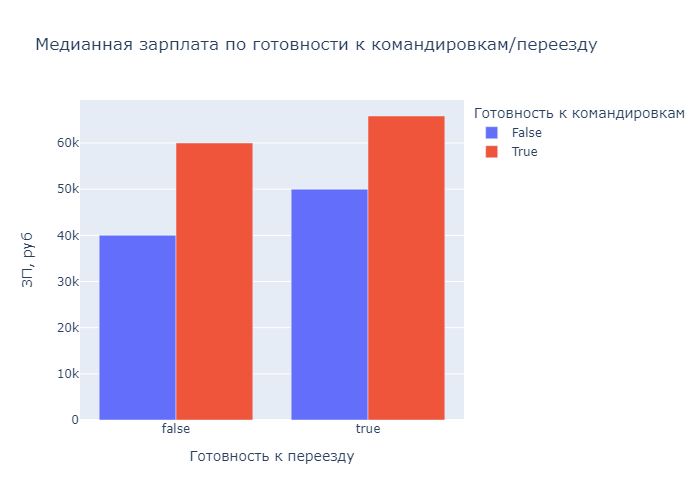

66.0

In [17]:
# задаем данные для диаграммы, группируем данные по признакам 'Готовность к командировкам', 'Готовность к переезду',
# и берем медианную зарплату
reloc_trip_data = data_hh_merged.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП, руб'].median()

# строим столбчатую диаграмму
reloc_trip_bar = px.bar(
    data_frame=reloc_trip_data,
    x='Готовность к переезду',
    y='ЗП, руб',
    barmode="group",
    color='Готовность к командировкам',
    title='Медианная зарплата по готовности к командировкам/переезду'
)

reloc_trip_bar.show("png")
reloc_trip_bar.write_html("plotly/reloc_trip_bar.html")

# Задание 4.6
# Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? 
# Ответ приведите в тысячах, округлив до целого (например, 45).
mask = data_hh_merged['Готовность к переезду'] == True
mask2 = data_hh_merged['Готовность к командировкам'] == True
display((data_hh_merged[mask&mask2]['ЗП, руб'].median()/1000).round(0))

График демонстрирует очевидную зависимость между уровнем заработной платы и готовностью к переезду или командировкам. Для кандидатов не готовых ни к переезду, ни к командировкам медиана желаемой зарплаты равна 45 тыс.руб., а соискатели, готовые и к тому, и к другому, претендуют по медиане на 65 тыс.руб. Логично, что претенденты хотят более высокой оплаты в подобных случаях. Интересно, что судя по медиане готовность к командировкам оценивается выше, чем готовность к переезду: медианы для этих позиций равны 60 и 50 тыс.руб. соответственно.  

7). Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

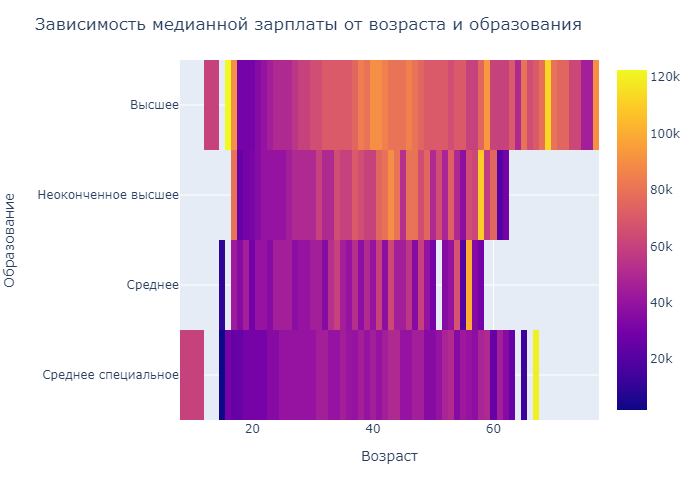

In [18]:
# задаем данные для графика - сводную таблицу
sal_pivot = data_hh_merged.pivot_table(
    values='ЗП, руб',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)


# строим тепловую карту 
pivot_fig = px.imshow(sal_pivot)

pivot_fig.update_layout(
    title='Зависимость медианной зарплаты от возраста и образования'
)

pivot_fig.show("png")
pivot_fig.write_html("plotly/pivot_fig.html")


График иллюстрирует зависимость медианной зарплаты от возраста и уровня образования. Прежде всего на тепловой карте  отчетливо просматриваются аномалии: 10-летние кандидаты, 14-летние кандидаты с высшим образованием, 17-летние с неоконченным высшим образованием (насколько же оно неоконченное?) и т.д. 

Кроме того сразу можно заметить, что медианы зарплат кандидатов со средним и средне-специальным образованием в целом ниже, чем у выпускников ВУЗов, и располагаются в диапазоне 30-50 тыс.руб.  Как правило на более высокие зарплаты (медиана - 80-90 тыс.руб.) претендуют соискатели среднего возраста (около 40 лет) с высшим образованием. Среди кандидатов с неоконченным высшим подобный уровень желаемой зарплаты у людей постарше. 

Вдобавок можно отметить, что для среднего специального и высшего образования распределение более плавное: запросы возрастают в соответствии с возрастом (предположительно с опытом), а потом постепенно снижаются. Для людей с неоконченным высшим образованием в возрасте 42-62 года медиана зарплаты "скачет", а  для людей со средним образованием зависимость зарплаты от возраста практически отсутствует - цветовая шкала хаотична.

8). Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

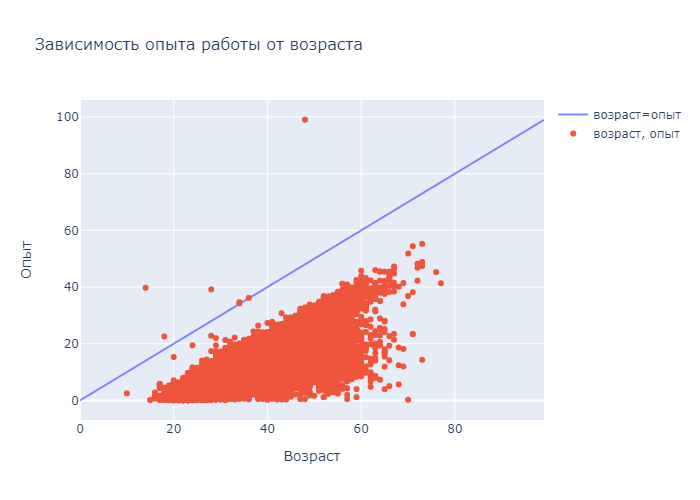

7

In [19]:
# задаем данные для 1 графика, n - чтобы определить координаты прямой
n=list(range(0, 100))
# задаем данные для 2 графика, при этом переводим опыт работы в года
exp_df = (data_hh_merged['Опыт работы, месяц']/12).round(2)
age_df = data_hh_merged['Возраст']

# строим графики
exp_age_fig = go.Figure()

exp_age_fig.add_trace(go.Scatter(
                    x=n,
                    y=n,
                    mode='lines',
                    name='возраст=опыт',
                    opacity=0.8)
)

exp_age_fig.add_trace(go.Scatter(
                    
                    x=age_df,
                    y=exp_df,
                    mode='markers',
                    name='возраст, опыт')
)

exp_age_fig.update_layout(
    title_text='Зависимость опыта работы от возраста',  
    title_font_size=16    
)
exp_age_fig.update_xaxes(
    title='Возраст'
)
exp_age_fig.update_yaxes(
    title='Опыт'
)

exp_age_fig.show("png")
exp_age_fig.write_html("plotly/exp_age_fig.html")

# Задание 4.8
# Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, 
# то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией, 
# либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.
wrong = exp_df > age_df
display(wrong[wrong == True].shape[0])

Прежде всего график показывает, что для некоторой части кандидатов существует прямая зависимость между возрастом и опытом работы - чем старше человек, тем больше у него  опыта.  Однако также существует огромное количество значений, где опыт  одинаков у людей самого разного возраста. При этом, если верить графику некоторые соискатели, начали работать в самом юном возрасте - лет в 10-12.  Исключив подобные нелогичные значения, можно сделать вывод, что, в целом, зависимость между этими признаками слабая. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


### График зависимости уровня желаемой зарплаты и занятости 

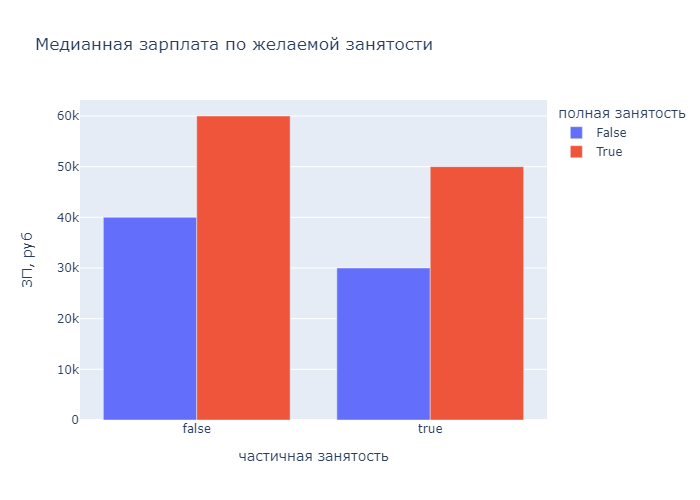

In [20]:
# задаем данные для графика
full_part_df = data_hh_merged.groupby(
    ['полная занятость', 'частичная занятость'],
    as_index=False
)['ЗП, руб'].median()

# строим график

full_part_fig = px.bar(
    data_frame=full_part_df,
    x='частичная занятость',
    y='ЗП, руб',
    barmode="group",
    color='полная занятость',
    title='Медианная зарплата по желаемой занятости'
)

full_part_fig.show("png")
full_part_fig.write_html("plotly/full_part_fig.html")

На графике показано, что самая высокая медиана зарплаты у кандидатов, которые предпочитают полную занятость частичной - 60 тыс.руб. На втором месте претенденты, согласные и на полную, и на частичную занятость - 50 тыс.руб. При этом медианы соискателей, не желающих ни полной, ни частичной занятости, выше, чем у претендующих только на частичную занятость - 40 и 30 тыс.руб. соответственно. Можно предположить, что кандидаты на частичную занятость ищут подработку, совмещение или согласны на любой вариант, а те, кто не заинтересован ни в полной, ни в частичной занятости, возможно ищут другой график (вахтовый метод, например).

### График зависимости желаемой зарплаты от графика

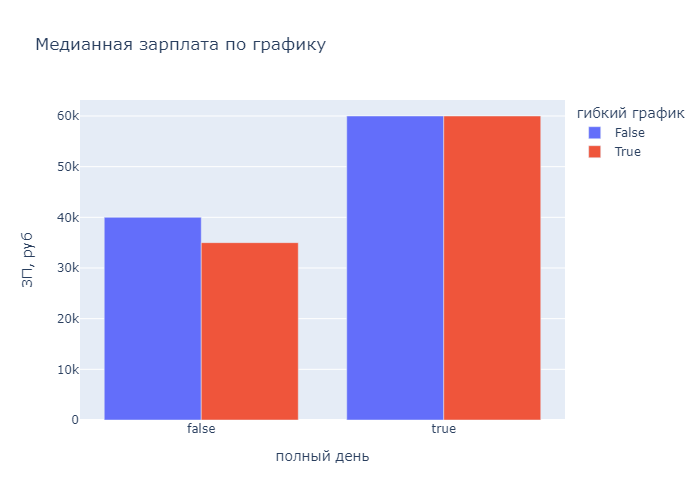

In [21]:
# задаем данные для графика
sched_df = data_hh_merged.groupby(
    ['полный день', 'гибкий график'],
    as_index=False
)['ЗП, руб'].median()

# строим график

sched_fig = px.bar(
    data_frame=sched_df,
    x='полный день',
    y='ЗП, руб',
    barmode="group",
    color='гибкий график',
    title='Медианная зарплата по графику'
)

sched_fig.show("png")
sched_fig.write_html("plotly/sched_fig.html")

Данный график демонстрирует, что на самую высокую зарплату претендуют кандидаты, согласные и на полный день, и на гибкий график - медиана равна 60 тыс.руб. Впрочем такая же медианная зарплата и у тех, кто согласен на полный рабочий день, но не на гибкий график. И вновь соискатели не указавшие в числе желательных ни тот, ни другой пункт, по медиане претендуют на более высокую зарплату, чем те, кто ищет только гибкий график - 40 и 34 тыс.руб соответственно.
Можно предположить, что кандидаты оценивают свое время -  отказ от полного дня в пользу гибкого графика снижает притязания почти вдвое. Вместе с тем более высокая медиана зарплаты для кандидатов, отказавшихся и от полного дня, и от гибкого графика, может быть связана с выбором вахтового метода. 

# Очистка данных

1). Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# удаляем дубликаты
data_hh_drop = data_hh_merged.drop_duplicates(ignore_index=True) 

# Задание 5.1
# Сколько полных копий удалось найти?
a = data_hh_merged.shape[0]
b = data_hh_drop.shape[0]
display(a-b)

161

2). Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# применяем метод isnull(), находим долю пропусков в общем числе значений (mean()), переводим в проценты
null_clmns = data_hh_drop.isnull().mean()*100
# выводим столбцы, где доля пропусков больше 0
display(null_clmns[null_clmns>0])

# Задание 5.2
# Сколько пропусков в столбце «Опыт работы (месяц)»?
display(data_hh_drop['Опыт работы, месяц'].isnull().sum())

Последнее/нынешнее место работы    0.002243
Последняя/нынешняя должность       0.004486
Опыт работы, месяц                 0.376825
dtype: float64

168

3). Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# ваш код здесь
data_hh_drop = data_hh_drop.dropna(how='any', axis=0, subset=['Последнее/нынешнее место работы',
       'Последняя/нынешняя должность'])
# df['col1'] = df['col1'].fillna(df['col1'].median())
data_hh_drop['Опыт работы, месяц'] = data_hh_drop['Опыт работы, месяц'].fillna(value=data_hh_drop['Опыт работы, месяц'].median())

# Задание 5.3
# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? 
# Ответ округлите до целых.
data_hh_drop['Опыт работы, месяц'].mean().round(0)

114.0

4). Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# фильтруем данные меньше 1000 и больше 1000000 руб и записываем в переменную outliers
# удаляем отфильтрованные строки
outliers = data_hh_drop[(data_hh_drop['ЗП, руб'] < 1000) | (data_hh_drop['ЗП, руб'] > 1000000)]
data_hh_drop = data_hh_drop.drop(outliers.index)

# Задание 5.4
# Сколько выбросов вы нашли?
display(outliers.shape[0])

89

5). В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# фильтруем данные, где опыт работы (в годах) больше возраста и записываем в переменную mega_exp
# удаляем отфильтрованные строки
mega_exp = data_hh_drop[data_hh_drop['Опыт работы, месяц']/12 > data_hh_drop['Возраст']]
data_hh_drop = data_hh_drop.drop(mega_exp.index)

# Задание 5.5
# Сколько выбросов вы нашли?
display(mega_exp.shape[0])

7

6). В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

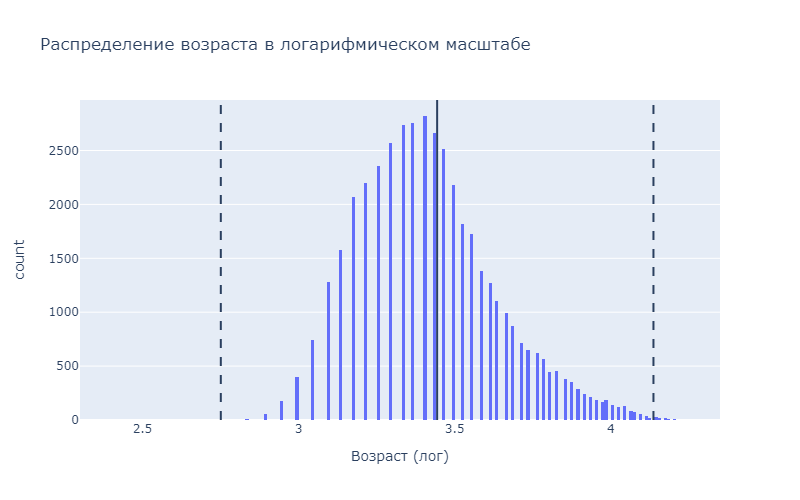

0.4474582108078904

In [27]:
# задаем данные для графика с помощью функции log() из библиотеки numpy 
log_age= np.log(data_hh_drop['Возраст'])
# строим график
age_log_fig = px.histogram(
    data_frame=data_hh_drop,
    x=log_age,
    width=800, 
    title='Распределение возраста в логарифмическом масштабе',
    labels={'x':'Возраст (лог)'}
)

# добавляем вертикальные линии - среднее и границы интервала
age_log_fig.add_vline(x=log_age.mean())
age_log_fig.add_vline(x=log_age.mean()-3*log_age.std(), line_dash="dash")
age_log_fig.add_vline(x=log_age.mean()+3*log_age.std(), line_dash="dash")

age_log_fig.show("png")
age_log_fig.write_html("plotly/age_log_fig.html")

# вычисляем численный показатель асимметрии
display(log_age.skew())


In [28]:
# ищем выбросы при помощи метода z-отклонения (используем ранее написанную формулу), 
# для верхней границы берем 4 сигмы
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers_age, cleaned_age = outliers_z_score(data_hh_drop, 'Возраст', log_scale=True)

# выводим таблицу с выбросами
display(outliers_age)

# Задание 5.6
# Сколько выбросов вы нашли с помощью метода z-отклонений?
print(f'Число выбросов по методу z-отклонения: {outliers_age.shape[0]}')



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, месяц",Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,"ЗП, руб"
30982,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32795,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33499,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,10,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0


Число выбросов по методу z-отклонения: 3


Распределение имеет правостороннюю асимметрию (As>0). Применив метод z-отклонения (с послаблением на 1 сигму в правую сторону), мы получили 3 выброса. Это соискатели с возрастом 10 (1 чел.) и 15 (2 чел.) лет.